# Analysis of Library and Modern Reader Popularity

I have decided to look **OCLC_HOLDINGS** (library popularity) and **GR_NUM_RATINGS** (Goodreads ratings) to identify novels that are popular both in libraries and among moderrn readers. This will look which books have stood the test of time from traditonal means to online.

## Step 1: Load Data

First, we will import the necessary libraries and load the dataset to inspect the relevant columns.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (using the provided file)
data = pd.read_csv('library_top_500.csv')

# Display the first few rows and structure of the data
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   top_500_rank              500 non-null    int64  
 1   title                     500 non-null    object 
 2   author                    500 non-null    object 
 3   pub_year                  500 non-null    int64  
 4   orig_lang                 500 non-null    object 
 5   genre                     500 non-null    object 
 6   author_birth              499 non-null    object 
 7   author_death              496 non-null    object 
 8   author_gender             499 non-null    object 
 9   author_primary_lang       499 non-null    object 
 10  author_nationality        499 non-null    object 
 11  author_field_of_activity  329 non-null    object 
 12  author_occupation         458 non-null    object 
 13  oclc_holdings             495 non-null    float64
 14  oclc_ehold

(   top_500_rank                                      title  \
 0             1                         <i>Don Quixote</i>   
 1             2    <i>Alice's Adventures in Wonderland</i>   
 2             3  <i>The Adventures of Huckleberry Finn</i>   
 3             4        <i>The Adventures of Tom Sawyer</i>   
 4             5                     <i>Treasure Island</i>   
 
                    author  pub_year orig_lang    genre author_birth  \
 0     Miguel de Cervantes      1605   Spanish   action         1547   
 1           Lewis Carroll      1865   English  fantasy         1832   
 2              Mark Twain      1884   English   action         1835   
 3              Mark Twain      1876   English   action         1835   
 4  Robert Louis Stevenson      1883   English   action         1850   
 
   author_death author_gender author_primary_lang  ... gr_num_ratings  \
 0         1616          male                 spa  ...        269,435   
 1         1898          male           

## Data Cleaning

To get meaningful analysis we will need to clean the data.
- **OCLC_HOLDINGS** should be numeric
- **GR_NUM_RATINGS** is stored as a string with commas, so we will convert it to numeric for easier comparison.


In [10]:
data = data.dropna(subset=['oclc_holdings', 'gr_num_ratings']).copy()

data['gr_num_ratings'] = data['gr_num_ratings'].astype(str).str.replace(',', '').astype(float)


## Step 3: Visualize the Relationship

I decided to visualize the realtionship between library holdings and Goodreads ratings with a scatter plot.

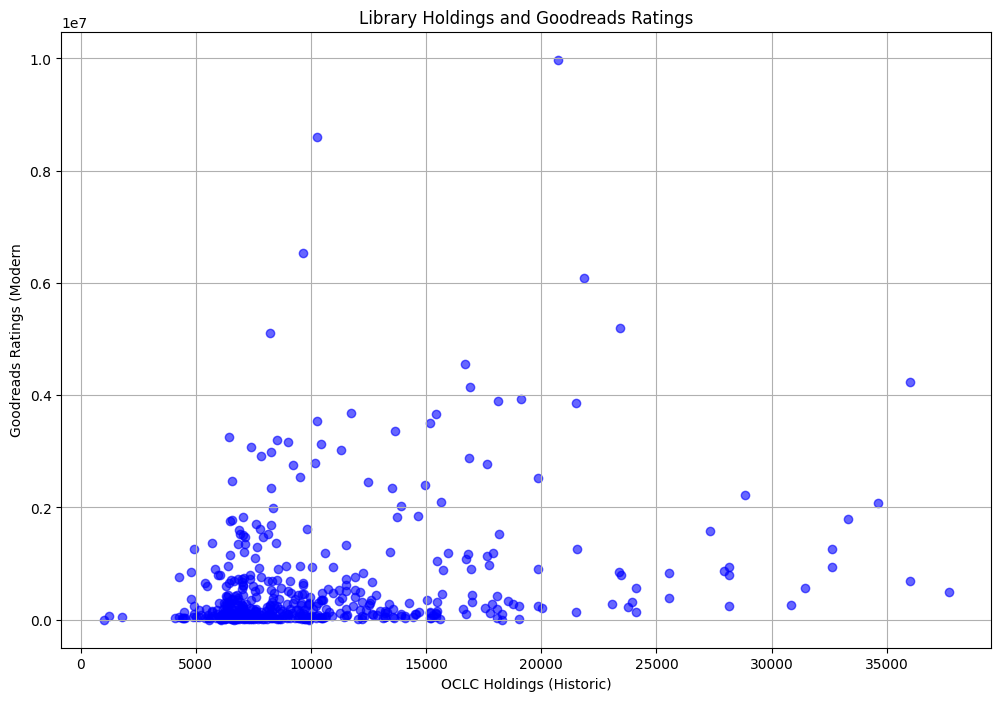

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(data['oclc_holdings'], data['gr_num_ratings'], alpha=0.6, color='blue')
plt.title('Library Holdings and Goodreads Ratings')
plt.xlabel('OCLC Holdings (Historic)')
plt.ylabel('Goodreads Ratings (Modern')
plt.grid(True)
plt.show()

## Step 4: Identify Top Works by Library and Goodreads Popularity

We will identify the top 10 works with the highest values in both **OCLC_HOLDINGS** and **GR_NUM_RATINGS** to highlight novels that have maintained popularity across both platforms.

In [16]:
# Identify top 10 works by library holdings and Goodreads ratings
top_library_holdings = data.nlargest(10, 'oclc_holdings')[['title', 'author', 'oclc_holdings', 'gr_num_ratings']].reset_index()
top_goodreads_ratings = data.nlargest(10, 'gr_num_ratings')[['title', 'author', 'oclc_holdings', 'gr_num_ratings']].reset_index()

top_library_holdings, top_goodreads_ratings

(   index                                      title                  author  \
 0      4                     <i>Treasure Island</i>  Robert Louis Stevenson   
 1      5                 <i>Pride and Prejudice</i>             Jane Austen   
 2     88                          <i>Persuasion</i>             Jane Austen   
 3      7                           <i>Jane Eyre</i>        Charlotte Brontë   
 4      6                   <i>Wuthering Heights</i>            Emily Brontë   
 5      2  <i>The Adventures of Huckleberry Finn</i>              Mark Twain   
 6      3        <i>The Adventures of Tom Sawyer</i>              Mark Twain   
 7      8                           <i>Moby Dick</i>         Herman Melville   
 8      0                         <i>Don Quixote</i>     Miguel de Cervantes   
 9     15                        <i>Little Women</i>       Louisa May Alcott   
 
    oclc_holdings  gr_num_ratings  
 0        37702.0        486155.0  
 1        36023.0       4239555.0  
 2        

## Step 5: Insights

From the scatter plot and the top 10 lists, we can observe:
- **As we can see some books with high popularity in both libraries and Goodreads**: These books have maintained popularity through the years. There's only small amount of books here. Looking at the top 10, you can see a lot of classic books many of which students are required to read as they go through schooling. 
- **This analysis can shows the differences between traditional and modern readership trends.**